# <center>Heart Disease Prediction</center>

## Foundations: Clean Data

Using both Cleveland and Statlog datasets available at  (https://archive.ics.uci.edu/ml/datasets/Heart+Disease) and (http://archive.ics.uci.edu/ml/datasets/statlog+(heart)) respectively.

The challenge is to build a model to predict the presence or abscence of heart disease based on the followinf fields:
- <b>Age</b> (int) - Age of the patient       
- <b>sex</b> (str) - The gender of the patient       
- <b>cp</b> (int) - chest pain type  (4 values)       
- <b>trestbps</b> (int) - Resting blood pressure  
- <b>chol</b> (int ) - Serum cholestoral in mg/dl      
- <b>fbs</b> (int) - Fasting blood sugar > 120 mg/dl       
- <b>restecg</b> () - Resting electrocardiographic results  (values 0,1,2) 
- <b>thalach</b> () - Maximum heart rate achieved  
- <b>exang</b> () - Eexercise induced angina    
- <b>oldpeak</b> () - ST depression induced by exercise relative to rest   
- <b>slope</b> () The slope of the peak exercise ST segment     
- <b>ca</b> () Number of major vessels (0-3) colored by flourosopy        
- <b>thal</b> () - (3 = normal; 6 = fixed defect; 7 = reversable defect) 

## Read in Data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

cleveland_df = pd.read_csv('datasets/cleveland.csv', names= ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'])
cleveland_df.name = "Cleveland Dataset"

statlog_df = pd.read_csv('datasets/statlog.csv', names= ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'])
statlog_df.name = "Statlog Dataset"

df = [cleveland_df, statlog_df]

In [2]:
cleveland_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [3]:
statlog_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1


## Convert target variable to binary form (0  = no heart disease, 1 = heart disease)

In [4]:
cleveland_df['target'].replace([1,2,3,4], 1, inplace = True)

statlog_df['target'].replace([1,2], [0,1], inplace = True)

## Data cleaning

### Checking for missing values

In [5]:
for dataset in df:
    print(dataset.name)
    print(dataset.isnull().sum(),  '\n')

Cleveland Dataset
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64 

Statlog Dataset
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64 



### Fill missing for `Ca` and `thal` with the avarage value of age and thal respectively

In [6]:
cleveland_df['ca'].fillna(cleveland_df['ca'].mode()[0], inplace=True)
cleveland_df['thal'].fillna(cleveland_df['thal'].mode()[0], inplace=True)

<Figure size 432x288 with 0 Axes>

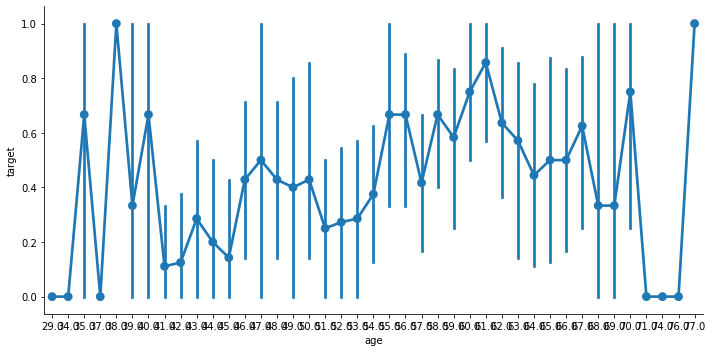

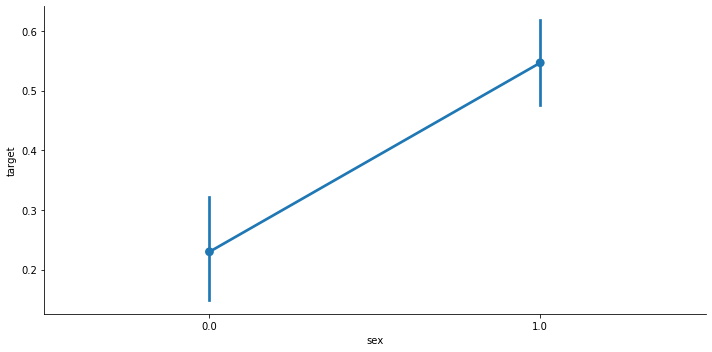

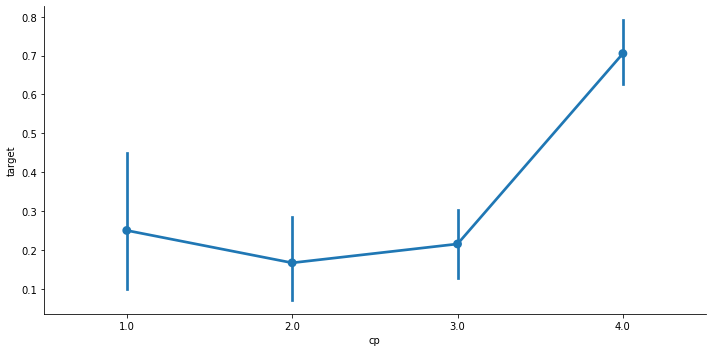

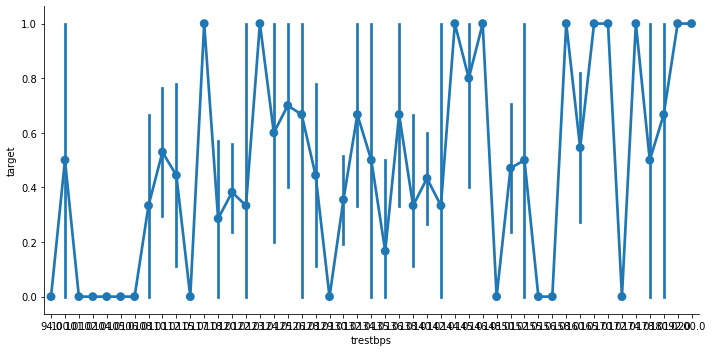

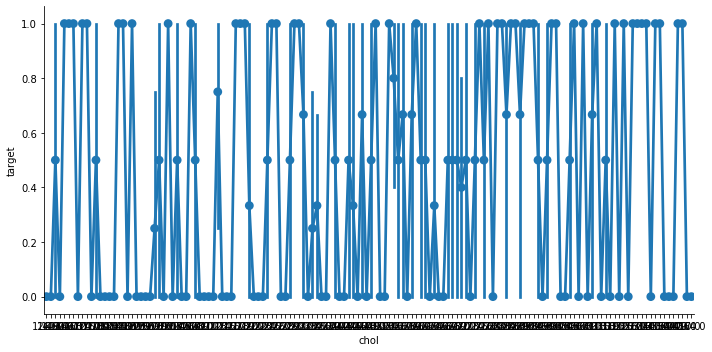

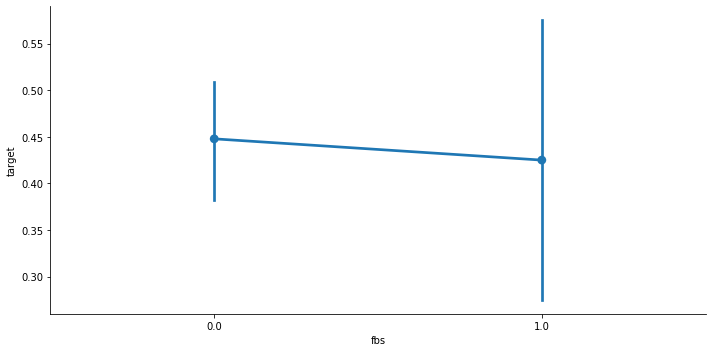

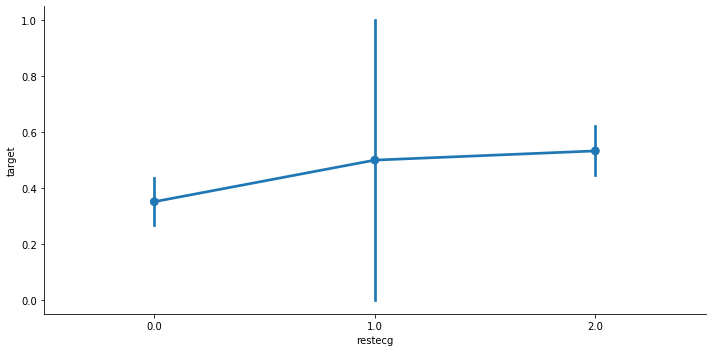

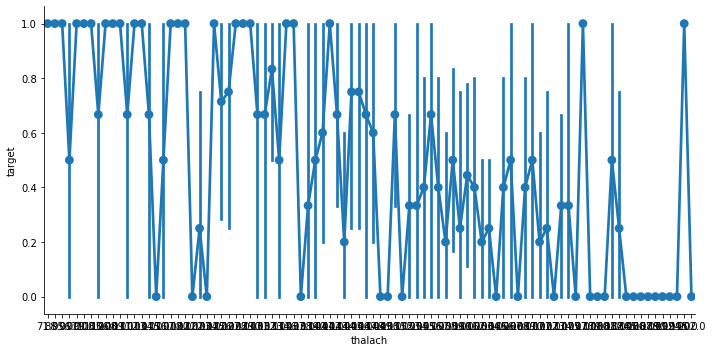

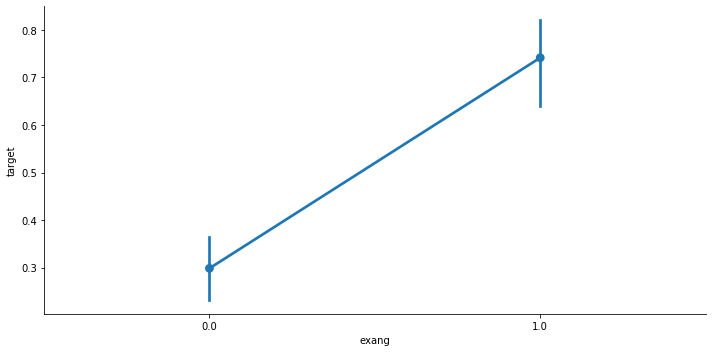

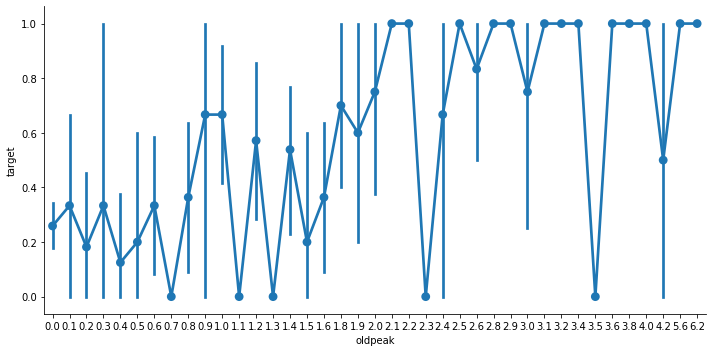

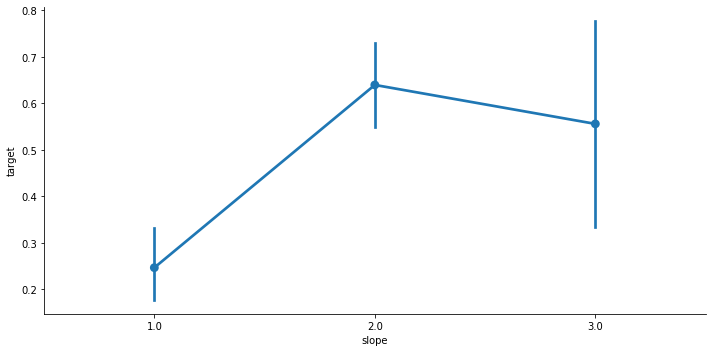

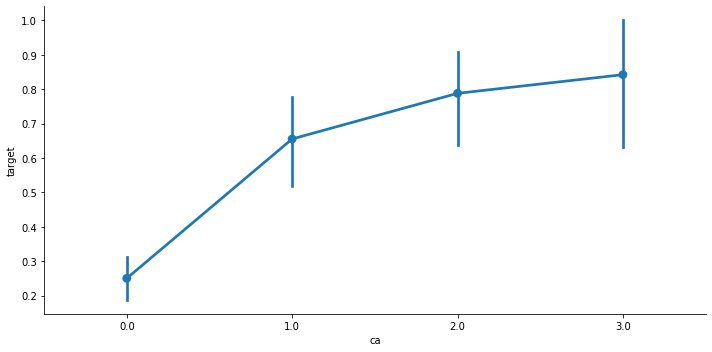

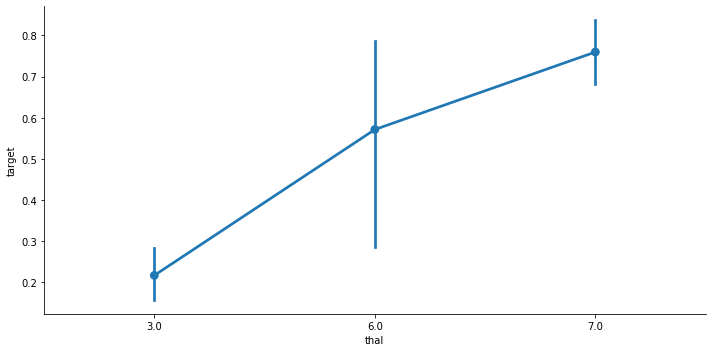

In [7]:
for i, col in enumerate(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']):
    plt.figure(i)
    sns.catplot(x=col, y='target', data=statlog_df, kind='point', aspect=2,)

### Writeout cleaned data

In [8]:
frames = [cleveland_df, statlog_df]
dataset = pd.concat(frames)

# cataset.to_csv('datasets/hdps_cleaned.csv', index=False)
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [9]:
dataset.shape

(573, 14)

In [10]:
from sklearn.utils import shuffle

df = shuffle(dataset)

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
121,63.0,0.0,4.0,150.0,407.0,0.0,2.0,154.0,0.0,4.0,2.0,3.0,7.0,1
90,59.0,1.0,2.0,140.0,221.0,0.0,0.0,164.0,1.0,0.0,1.0,0.0,3.0,0
208,64.0,1.0,3.0,125.0,309.0,0.0,0.0,131.0,1.0,1.8,2.0,0.0,7.0,1
187,52.0,1.0,4.0,108.0,233.0,1.0,0.0,147.0,0.0,0.1,1.0,3.0,7.0,0
95,47.0,1.0,4.0,110.0,275.0,0.0,2.0,118.0,1.0,1.0,2.0,1.0,3.0,1


In [11]:
df.to_csv('datasets/hdps_cleaned.csv', index=False)